In [ ]:
#import necessary packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import warnings 
warnings.simplefilter('ignore') 
import os
import fnmatch

#load map packages
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from calendar import month_abbr

In [ ]:
os.getcwd()

In [ ]:
os.chdir('../2022_SummerInternship_FarallonInstitute/saildrone_data')

In [ ]:
os.listdir()

In [ ]:
#variables: regions designated by number
west_coast = 1
arctic = 2
atlantic = 3
gulf_of_mexico = 4
pacific = 5

#user input needed for output of files
region = int(input("Enter the number of the desired region you'd like to see files from: "))

In [ ]:
def select_region (region):
    #returns the list of files
    if (region == 1):
        file_list = []
        for file in os.listdir('.'):
            if fnmatch.fnmatch(file, '*west_coast*'):
                file_list.append(file)
        print (file_list)
    elif (region == 2):
        file_list = []
        for file in os.listdir('.'):
            if fnmatch.fnmatch(file, '*saildrone_arctic*'):
                file_list.append(file)
        print (file_list)
    elif (region == 3):
        file_list = []
        for file in os.listdir('.'):
            if fnmatch.fnmatch(file, '*saildrone-gen_5*'):
                file_list.append(file)
        print (file_list) 
    elif (region == 4):
        file_list = []
        for file in os.listdir('.'):
            if fnmatch.fnmatch(file, '*saildrone-gen_4*'):
                file_list.append(file)
        print (file_list)
    else:
        file_list = []
        for file in os.listdir('.'):
            if fnmatch.fnmatch(file, '*saildrone_tpos*'):
                file_list.append(file)
        print (file_list)



In [ ]:
select_region(region)

In [8]:
#west coast sample datafile
ds2 = xr.open_dataset('/home/aleydisreyes/2022_SummerInternship_FarallonInstitute/saildrone_data/saildrone_west_coast_survey_2018_sd1024_JPLv5.0_8dy_20210613norep_20210613_20211116.nc')
ds2

<xarray.Dataset>
Dimensions:                       (time: 321)
Coordinates:
    trajectory                    object ...
  * time                          (time) datetime64[ns] 2018-07-17T18:35:00 ....
    ob                            (time) int64 ...
Data variables: (12/41)
    lat                           (time) float64 ...
    lon                           (time) float64 ...
    SOG_MEAN                      (time) float64 ...
    COG_MEAN                      (time) float64 ...
    HDG_MEAN                      (time) float64 ...
    PITCH_MEAN                    (time) float64 ...
    ...                            ...
    sat_lon                       (time) float64 ...
    dist_land                     (time) float64 ...
    analysed_sst                  (time) float64 ...
    analysis_error                (time) float64 ...
    mask                          (time) float64 ...
    sea_ice_fraction              (time) float64 ...
Attributes: (12/47)
    area:                      unassigned
    cdm_data_type:             Trajectory
    cdm_trajectory_variables:  trajectory
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             support@saildrone.com
    creator_name:              Saildrone
    ...                        ...
    time_coverage_resolution:  PT1M
    time_coverage_start:       2018-07-17T18:00:00Z
    title:                     Saildrone West Coast Survey 2018
    uuid:                      3e4ce677-18db-4ba8-9c73-f2c1f3ad15ce
    Westernmost_Easting:       -124.915008
    vehicle_id:                sd1024

In [9]:
#outputting trajacetory of sample datafile
ds2.trajectory

<xarray.DataArray 'trajectory' ()>
array('1024.0', dtype=object)
Coordinates:
    trajectory  object '1024.0'
Attributes:
    axis:           E
    cf_role:        trajectory_id
    comment:        A trajectory is a single deployment of a drone
    long_name:      Trajectory/Drone ID
    point_spacing:  even

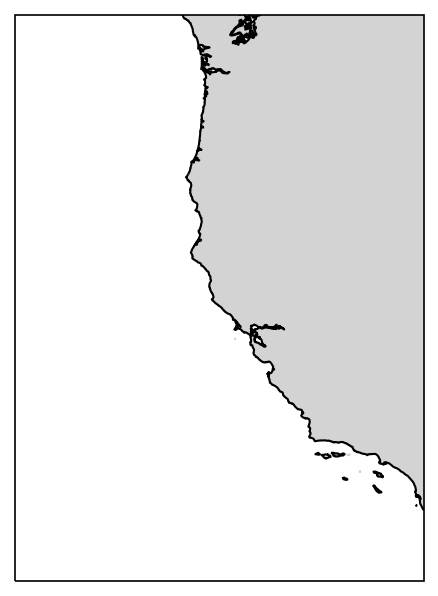

In [10]:
#west coast
fig=plt.figure(figsize=(12,5),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-130,-117,30,48],crs=ccrs.PlateCarree())
#ax.set_xticks([-130,-125,-120], crs=ccrs.PlateCarree())
#ax.set_yticks([30,35,40,45,50], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, color='lightgrey')